In [3]:
# set up our environment
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

import acquire
import prepare
import explore

from statsmodels.formula.api import ols

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

plt.rcParams['figure.figsize'] = (4, 2)

In [4]:
# ACQUIRE the telco_churn data from our mySQL database
# from the acquire file, pull the csv file 
# shape = (7043,24)
df = acquire.read_telco_data()
df.shape

(7043, 24)

In [5]:
# PREPARE the data
# from the prepare file, start preparing the data for explore from the prepare function
# prep_telco function
# shape = (7043,24)
prepare.prep_telco(df)
# create_tenure function: creating tenure year column, 
# shape = (7043,25)
prepare.create_tenure_year(df)
# is_churn function: Function used to create a new column for churn
prepare.is_churn(df)
# encode_all function: encodes columns into integers
# shape = (7043,26)
prepare.encode_all(df)
# security_features, backup_features, device_protection and encoding
# shape = (7043,29)
prepare.security_features(df)
prepare.backup_features(df)
prepare.device_protection_features(df)
prepare.encode_feature_columns(df)
df.shape

(7043, 29)

In [6]:
df.describe()

,internet_service_type_id,payment_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,tenure_years
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.872923,2.315633,1.690473,0.162147,32.371149,64.761692,2279.734304,2.285958
std,0.737796,1.148907,0.833755,0.368612,24.559481,30.090047,2266.794470,2.017253
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000,398.550000,0.000000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000,1394.550000,2.000000
75%,2.000000,3.000000,2.000000,0.000000,55.000000,89.850000,3786.600000,4.000000
max,3.000000,4.000000,3.000000,1.000000,72.000000,118.750000,8684.800000,6.000000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.00,2.00,2.00,3.00
payment_type_id,7043.0,2.315633,1.148907,1.00,1.00,2.00,3.00,4.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.00,1.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
total_charges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
tenure_years,7043.0,2.285958,2.017253,0.00,0.00,2.00,4.00,6.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   internet_service_type_id    7043 non-null   int64  
 1   payment_type_id             7043 non-null   int64  
 2   contract_type_id            7043 non-null   int64  
 3   customer_id                 7043 non-null   object 
 4   gender                      7043 non-null   object 
 5   senior_citizen              7043 non-null   int64  
 6   partner                     7043 non-null   object 
 7   dependents                  7043 non-null   object 
 8   tenure                      7043 non-null   int64  
 9   phone_service               7043 non-null   object 
 10  multiple_lines              7043 non-null   object 
 11  online_security             7043 non-null   object 
 12  online_backup               7043 non-null   object 
 13  device_protection           7043 

In [9]:
df.tenure.unique()

array([65, 54, 56, 20, 72, 71, 61, 25, 70, 66, 48, 50, 52, 60, 68, 67, 69,
       55, 62, 13, 63, 49, 37, 58, 57, 59, 64, 10,  8, 30, 47, 51, 53, 39,
        0, 33, 45, 24, 31, 23, 43, 32, 41,  3, 36, 46, 21, 35, 15, 29, 42,
        2, 26, 14, 44, 34, 16, 27,  6, 38,  7, 22, 12,  9, 19, 11, 40, 18,
       17,  1,  5, 28,  4])

In [10]:
df.security_features.unique()

array([1, 2, 3], dtype=object)

In [11]:
df.online_security.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [12]:
df.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,total_charges,churn,contract_type,payment_type,internet_service_type,tenure_years,is_churn,security_features,backup_features,device_protection_features
0,1,2,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,5957.90,No,Two year,Mailed check,DSL,5,False,1,1,1
1,1,4,3,0017-DINOC,Male,0,No,No,54,No,...,2460.55,No,Two year,Credit card (automatic),DSL,4,False,1,1,1
2,1,3,3,0019-GFNTW,Female,0,No,No,56,No,...,2560.10,No,Two year,Bank transfer (automatic),DSL,4,False,1,1,1
3,1,4,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,825.40,No,Two year,Credit card (automatic),DSL,1,False,1,1,1
4,1,3,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,6316.20,No,Two year,Bank transfer (automatic),DSL,6,False,1,1,1


In [13]:
df.columns

Index(['internet_service_type_id', 'payment_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'payment_type',
       'internet_service_type', 'tenure_years', 'is_churn',
       'security_features', 'backup_features', 'device_protection_features'],
      dtype='object')

In [14]:
# Split data into Train, Validate, Test
target = 'is_churn'

In [15]:
prepare.train_validate_test_split(df, target, seed=123)

(      internet_service_type_id  payment_type_id  contract_type_id customer_id  \
 5642                         3                4                 3  1982-FEBTD   
 3338                         2                3                 2  8982-NHAVY   
 4273                         2                1                 1  4115-NZRKS   
 2382                         1                3                 1  9633-DENPU   
 2655                         2                4                 3  5693-PIPCS   
 ...                        ...              ...               ...         ...   
 5354                         2                4                 1  9283-LZQOH   
 262                          1                3                 3  4664-NJCMS   
 3271                         2                1                 2  7694-VLBWQ   
 3150                         2                3                 2  5440-VHLUL   
 6840                         3                2                 1  5906-BFOZT   
 
       gender 

In [16]:
train, validate, test = prepare.train_validate_test_split(df, target='is_churn')
train.head

<bound method NDFrame.head of       internet_service_type_id  payment_type_id  contract_type_id customer_id  \
5642                         3                4                 3  1982-FEBTD   
3338                         2                3                 2  8982-NHAVY   
4273                         2                1                 1  4115-NZRKS   
2382                         1                3                 1  9633-DENPU   
2655                         2                4                 3  5693-PIPCS   
...                        ...              ...               ...         ...   
5354                         2                4                 1  9283-LZQOH   
262                          1                3                 3  4664-NJCMS   
3271                         2                1                 2  7694-VLBWQ   
3150                         2                3                 2  5440-VHLUL   
6840                         3                2                 1  5906-BFOZT  

In [17]:
print(train.shape, validate.shape, test.shape)

(3943, 29) (1691, 29) (1409, 29)


In [18]:
73+27

100

# Univariate Stats
   - Descriptive stats, frequencies, histograms
        - This is often done during prep prior to splitting into train/validate/test, but if it is not, then it should be done first here. Why? Outliers. Running tests that assume normalcy. Scale of each variable. General "getting to know" your data.

Takeaways & Actions: 

Significant takeaways: 
- is_churn   
     - 27% of users churn
     - 73% of users do not churn
     
- internet_service_type_id
    - 44% 3: NO internet service type
    - 35% 2: Fiber Optic (1365)
    - 21% 1: DSL (838)

- phone_service
    - Could be significant as 90% of users have phone service, we all know its a hassle to change phone providers, change numbers, etc 
    - How do we make sure these phone service users dont churn?
    - 90% DO have phone service
    - 10% DO NOT have phone service

WANT TO FOCUS ON for KT&T TAKEAWAYS - but these are all for ONLY internet services: 
- 'online_security'
    - 50% NO internet service (1956)
    - 29% NO online_security (1149)
    - 21% YES online security (838)
   
- 'online_backup'
    - 43% NO internet service (1703)
    - 36% NO online_backup (1402)
    - 21% YES online_backup (838)
    
- 'device_protection'
    - 43% NO internet service (1696)
    - 21% NO device_protection (838)
    - 36% YES device_protection (1409)
    
- 'tech_support'
    - 48% NO internet service (1921)
    - 30% NO tech support (1184)
    - 21% YES techsupport (838)
    
Could be significant takeaways:  
- dependants
    - Could be potentially significant?
    - 70% of users DONT have dependenta
    - 30% of users DO have dependants
    
- tenure
    - All over the place, but could be relevant down the line
     
Unsignificant takeaways:
- gender
    - pretty much equal, not much to see here
    
- senior_citizen
    - There is a large amount of non-senior citizens, but I don't think this is really a focus of churn
    - 84% are NOT senior citizens 
    - 16% ARE senior citizens 
    
- partner
    - pretty much equal, not much to see here
    
- multiple lines
    - not really significant 
    

In [24]:
cat_vars = 'is_churn', 'internet_service_type_id', 'gender', 'senior_citizen', 'partner', 'dependents','tenure', 'phone_service', 'multiple_lines','online_security','online_backup', 'device_protection', 'tech_support'

In [25]:
quant_vars = 'monthly_charges', 'tenure_years'
# not including 'total_charges'

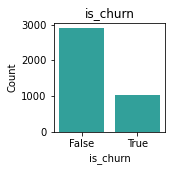

       is_churn  Count  Percent
False     False   2897    73.47
True       True   1046    26.53
_________________________________________________________________


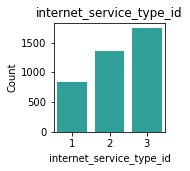

   internet_service_type_id  Count  Percent
2                         3   1740    44.13
1                         2   1365    34.62
3                         1    838    21.25
_________________________________________________________________


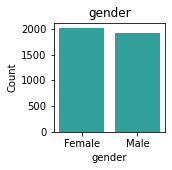

        gender  Count  Percent
Male    Female   2013    51.05
Female    Male   1930    48.95
_________________________________________________________________


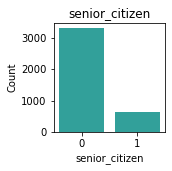

   senior_citizen  Count  Percent
0               0   3303    83.77
1               1    640    16.23
_________________________________________________________________


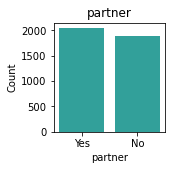

    partner  Count  Percent
No      Yes   2044    51.84
Yes      No   1899    48.16
_________________________________________________________________


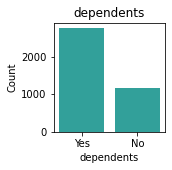

    dependents  Count  Percent
No         Yes   2764     70.1
Yes         No   1179     29.9
_________________________________________________________________


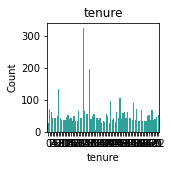

    tenure  Count  Percent
1       23    325     8.24
72      27    197     5.00
2        7    135     3.42
3       47    105     2.66
4       41     97     2.46
..     ...    ...      ...
45      37     31     0.79
28      40     29     0.74
36      35     28     0.71
47       0     28     0.71
0       31      7     0.18

[73 rows x 3 columns]
_________________________________________________________________


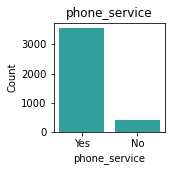

    phone_service  Count  Percent
Yes           Yes   3550    90.03
No             No    393     9.97
_________________________________________________________________


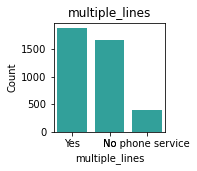

                    multiple_lines  Count  Percent
No                             Yes   1884    47.78
Yes                             No   1666    42.25
No phone service  No phone service    393     9.97
_________________________________________________________________


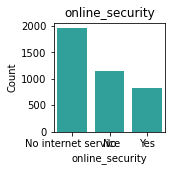

                         online_security  Count  Percent
No                   No internet service   1956    49.61
Yes                                   No   1149    29.14
No internet service                  Yes    838    21.25
_________________________________________________________________


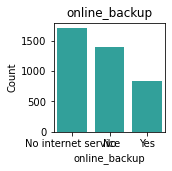

                           online_backup  Count  Percent
No                   No internet service   1703    43.19
Yes                                   No   1402    35.56
No internet service                  Yes    838    21.25
_________________________________________________________________


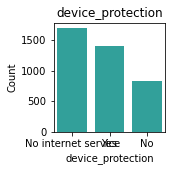

                       device_protection  Count  Percent
No                   No internet service   1696    43.01
Yes                                  Yes   1409    35.73
No internet service                   No    838    21.25
_________________________________________________________________


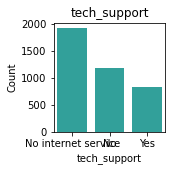

                            tech_support  Count  Percent
No                   No internet service   1921    48.72
Yes                                   No   1184    30.03
No internet service                  Yes    838    21.25
_________________________________________________________________


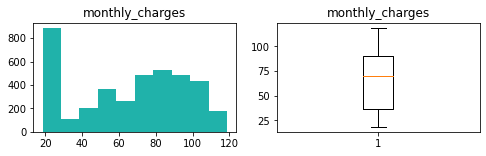

count    3943.000000
mean       65.102790
std        30.128631
min        18.550000
25%        36.200000
50%        70.400000
75%        90.050000
max       118.650000
Name: monthly_charges, dtype: float64


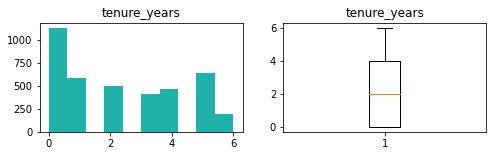

count    3943.000000
mean        2.313721
std         2.013710
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max         6.000000
Name: tenure_years, dtype: float64


In [26]:
explore.explore_univariate(train, cat_vars, quant_vars)

# Bivariate Stats
- We will use our explore_bivariate(train, target, cat_vars, quant_vars) function that takes in a dataframe, the name of the binary target variable, a list of the names of the categorical variables, a list of the names of the quantitative variables. 

Takeaways & Actions: 

Significant takeaways: 
- is_churn: Users are churning at about a 27% rate
     - 27% of users churn (1046)
     - 73% of users do not churn (2897)
     
# - internet_service_type_id: SIGNIFICANT amount of users 724/1365 training data users have CHURNED
    - 44% 3: NO internet service type -> 63 users are churning that don't have internet service
    - 35% 2: Fiber Optic (1365) -> 724 users are churning that have fiber optic
    - 21% 1: DSL (838) -> 259 users are churning that have DSL


WANT TO FOCUS ON for KT&T TAKEAWAYS - but these are all for ONLY internet services: 
- 'online_security'
    - 50% NO internet service (1956) -> 63 churn
    - 29% NO online_security (1149) -> 821 churn SIGNIFICANT
    - 21% YES online security (838) -> ONLY 162 churned SIGNIFICANT 
   
- 'online_backup'
    - 43% NO internet service (1703) -> 63 churned
    - 36% NO online_backup (1402)-> 677 churned
    - 21% YES online_backup (838) -> only 306 churned SIGNIFICANT
    
- 'device_protection'
    - 43% NO internet service (1696) -> 63 churned
    - 21% NO device_protection (838) -> 662 churned SIGNIFICANT
    - 36% YES device_protection (1409) -> ONLY 321 churned SIGNIFICANT
    
- 'tech_support'
    - 48% NO internet service (1921) -> 63 churned
    - 30% NO tech support (1184) -> 810 churned
    - 21% YES techsupport (838) -> ONLY 173 users churned SIGNIFICANT 
    
Could be significant takeaways: 
   
- tenure
    - All over the place, but could be relevant down the line

No longer focusing on: 

- phone_service - There are trends here, but we are going to focus more on internet service to build out the model and story
    - Could be significant as 90% of users have phone service, we all know its a hassle to change phone providers, change numbers, etc 
    - How do we make sure these phone service users dont churn?
    - 90% DO have phone service
    - 10% DO NOT have phone service
    
- dependants - There are trends here, but we are going to focus more on internet service to build out the model and story
    - Could be potentially significant?
    - 70% of users DONT have dependenta
    - 30% of users DO have dependants

In [22]:
target = 'is_churn'

In [27]:
# slimming down the cat variables to only significant cat variables explored in the Univariate Stats above: 
cat_vars = 'is_churn', 'internet_service_type_id','tenure', 'phone_service', 'multiple_lines','online_security','online_backup', 'device_protection', 'tech_support'

In [28]:
quant_vars = 'monthly_charges', 'tenure_years'
# not including 'total_charges'

is_churn 
_____________________

          chi2  p-value  degrees of freedom
0  3937.871007      0.0                   1

observed:
 is_churn  False  True   All
is_churn                   
False      2897     0  2897
True          0  1046  1046
All        2897  1046  3943

expected:
              0           1
0  2128.483135  768.516865
1   768.516865  277.483135


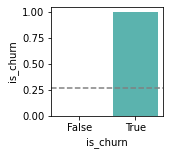


_____________________

internet_service_type_id 
_____________________

         chi2       p-value  degrees of freedom
0  398.382058  3.107673e-87                   2

observed:
 is_churn                  False  True   All
internet_service_type_id                   
1                          1106   259  1365
2                          1016   724  1740
3                           775    63   838
All                        2897  1046  3943

expected:
              0           1
0  1002.892468  362.107532
1  1278.412376  461.587624
2   615.695156  222.304844


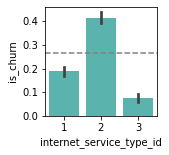


_____________________

tenure 
_____________________

         chi2       p-value  degrees of freedom
0  619.094065  6.005397e-88                  72

observed:
 is_churn  False  True   All
tenure                     
0             7     0     7
1           118   207   325
2            68    67   135
3            56    49   105
4            47    50    97
...         ...   ...   ...
69           44     5    49
70           61     7    68
71           87     4    91
72          196     1   197
All        2897  1046  3943

[74 rows x 3 columns]

expected:
              0          1
0     5.143038   1.856962
1   238.783921  86.216079
2    99.187167  35.812833
3    77.145574  27.854426
4    71.267816  25.732184
..         ...        ...
68   40.409587  14.590413
69   36.001268  12.998732
70   49.960943  18.039057
71   66.859498  24.140502
72  144.739792  52.260208

[73 rows x 2 columns]


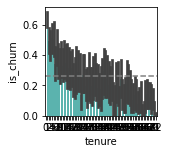


_____________________

phone_service 
_____________________

       chi2   p-value  degrees of freedom
0  0.480275  0.488298                   1

observed:
 is_churn       False  True   All
phone_service                   
No               295    98   393
Yes             2602   948  3550
All             2897  1046  3943

expected:
              0           1
0   288.744864  104.255136
1  2608.255136  941.744864


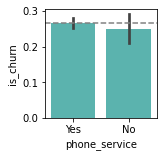


_____________________

multiple_lines 
_____________________

    chi2   p-value  degrees of freedom
0  6.928  0.031304                   2

observed:
 is_churn          False  True   All
multiple_lines                     
No                 1414   470  1884
No phone service    295    98   393
Yes                1188   478  1666
All                2897  1046  3943

expected:
              0           1
0  1384.212021  499.787979
1   288.744864  104.255136
2  1224.043114  441.956886


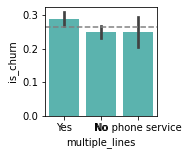


_____________________

online_security 
_____________________

         chi2        p-value  degrees of freedom
0  485.851141  3.153299e-106                   2

observed:
 is_churn             False  True   All
online_security                       
No                    1135   821  1956
No internet service    775    63   838
Yes                    987   162  1149
All                   2897  1046  3943

expected:
              0           1
0  1437.111844  518.888156
1   615.695156  222.304844
2   844.193000  304.807000


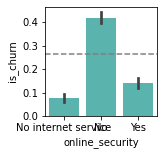


_____________________

online_backup 
_____________________

         chi2       p-value  degrees of freedom
0  324.108754  4.175210e-71                   2

observed:
 is_churn             False  True   All
online_backup                         
No                    1026   677  1703
No internet service    775    63   838
Yes                   1096   306  1402
All                   2897  1046  3943

expected:
              0           1
0  1251.227745  451.772255
1   615.695156  222.304844
2  1030.077099  371.922901


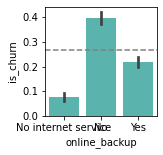


_____________________

device_protection 
_____________________

         chi2       p-value  degrees of freedom
0  301.592175  3.236618e-66                   2

observed:
 is_churn             False  True   All
device_protection                     
No                    1034   662  1696
No internet service    775    63   838
Yes                   1088   321  1409
All                   2897  1046  3943

expected:
              0           1
0  1246.084707  449.915293
1   615.695156  222.304844
2  1035.220137  373.779863


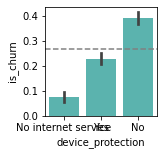


_____________________

tech_support 
_____________________

         chi2        p-value  degrees of freedom
0  482.650975  1.561969e-105                   2

observed:
 is_churn             False  True   All
tech_support                          
No                    1111   810  1921
No internet service    775    63   838
Yes                   1011   173  1184
All                   2897  1046  3943

expected:
              0           1
0  1411.396652  509.603348
1   615.695156  222.304844
2   869.908192  314.091808


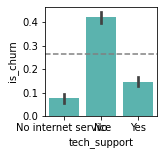


_____________________

monthly_charges 
____________________



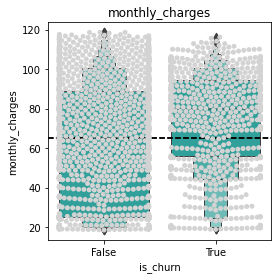

           count       mean        std    min    25%     50%      75%     max
is_churn                                                                     
False     2897.0  61.680877  31.166578  18.55  25.15  64.900  88.9000  118.65
True      1046.0  74.580115  24.696621  18.85  56.25  79.925  94.3875  116.20 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1160715.0, pvalue=2.891105812698731e-29)

____________________

tenure_years 
____________________



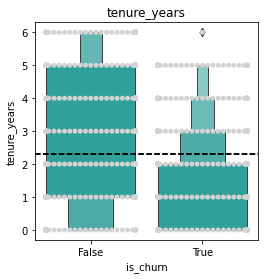

           count      mean       std  min  25%  50%  75%  max
is_churn                                                     
False     2897.0  2.728340  1.997685  0.0  1.0  3.0  5.0  6.0
True      1046.0  1.165392  1.562230  0.0  0.0  0.0  2.0  6.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2199803.0, pvalue=3.243085583327067e-108)

____________________



In [29]:
explore.explore_bivariate(train, target, cat_vars, quant_vars)

# Bivariate Stats
- We will use our explore_bivariate(train, target, cat_vars, quant_vars) function that takes in a dataframe, the name of the binary target variable, a list of the names of the categorical variables, a list of the names of the quantitative variables. 
- Each feature is analyzed with respect to the binary target variable.

    - For each categorical variable, a crosstab of frequencies is returned along with the results from a chi-square test that is run, and a barplot. 
     - For each quantitative variable, descriptive statistics are computed with respect to the target variable. 
     
- Difference in means of the quant variable are tested between each class in the target using Mann-Whitney. Finally, a boxenplot and a swarmplot of the target with the quantitative variable are returned.

Takeaways & Actions: 

Significant takeaways: 
     
# - internet_service_type_id: SIGNIFICANT amount of users 724/1365 training data users have CHURNED
   
   - 1: DSL -> 259/1106 churned observed
       - expected: 362 / 1002 chruned (a bit over churned, but close) 
   - 2: Fiber Optic -> 724/1016 churned ... why is fiber optic not on it? SIGNIFICANT observed
       - expected: 461/1278 churned (under churned)
   - 3: NO internet service type -> 63/775 churned observed
       - expected: 222/615 chruned expected -> really off from the observed (over churn)
   

WANT TO FOCUS ON for KT&T TAKEAWAYS - but these are all for ONLY internet services: 
- 'online_security'
    - NO online_security 821 / 1135 chruned observed -> SIGNIFICANT as loosing cutomers w/out online security
        - expected: 518/1437 (under churn expected)
    - NO internet service 63/775 chruned observed
         - expected: 222/615 (over churn expected)
    - YES online security 162/987 churn observed -> SIGNIFICANT as keeping customers who have online security
        - expected: 304/844 (over churn expected)
   
- 'online_backup'
    - NO online_backup 677/1026 churn observed -> SIGNIFICANT as loosing customers w/out online backup
        - expected: 451/1251 (under churn expected)
    - NO internet service 63/775 churn observed
        - expected: 222/615 (over churn expected)
    - YES online_backup 306/1096 churn observed -> SIGNIFICANT as keeping customers who have online backup
        - expected: 371/1030 (over churn expected, but not by much!)
    
- 'device_protection'
    - NO device_protection: 662/1031 churn observed
        - expected: 449/1246 (under churn expected)
    
    - NO internet service: 63/775 chrun observed
        - expected: 222/615 (over churn expected)
    
    - YES device_protection: 321/1088 churn observed
        - 373/1035 (over churn expected, but not by much!)
    
- 'tech_support'
    - NO tech support: 810/1111 chruned -> Significant as more than half of customers churned w/out device protection observed
        - 509/1411 chruned (under churn expected)
    
    - NO internet service: 63/775 observed
        - 222/615 (over churn expected)
        
    - YES techsupport:173/1011 churned observed
        - 314/869 (over churn expected)
    
Could be significant takeaways: 
   
- tenure
    - All over the place, but could be relevant down the line

No longer focusing on: 

- phone_service - There are trends here, but we are going to focus more on internet service to build out the model and story
    - Could be significant as 90% of users have phone service, we all know its a hassle to change phone providers, change numbers, etc 
    - How do we make sure these phone service users dont churn?
    - 90% DO have phone service
    - 10% DO NOT have phone service
    
- dependants - There are trends here, but we are going to focus more on internet service to build out the model and story
    - Could be potentially significant?
    - 70% of users DONT have dependenta
    - 30% of users DO have dependants

In [ ]:
# First verifying the lists of variables: 

In [30]:
# slimming down the cat variables to only significant cat variables explored in the Univariate & Bivariate Stats above: 
cat_vars = 'is_churn', 'internet_service_type_id','tenure','online_security','online_backup', 'device_protection', 'tech_support'

In [31]:
quant_vars = 'monthly_charges', 'tenure_years'
# not including 'total_charges'

In [32]:
# We will want to remove the target variable from that list, as the function takes that variable as a separate argument.
cat_vars = cat_vars[1:]

In [33]:
print(cat_vars)

('internet_service_type_id', 'tenure', 'online_security', 'online_backup', 'device_protection', 'tech_support')


internet_service_type_id 
_____________________

         chi2       p-value  degrees of freedom
0  398.382058  3.107673e-87                   2

observed:
 is_churn                  False  True   All
internet_service_type_id                   
1                          1106   259  1365
2                          1016   724  1740
3                           775    63   838
All                        2897  1046  3943

expected:
              0           1
0  1002.892468  362.107532
1  1278.412376  461.587624
2   615.695156  222.304844


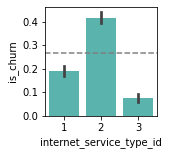


_____________________

tenure 
_____________________

         chi2       p-value  degrees of freedom
0  619.094065  6.005397e-88                  72

observed:
 is_churn  False  True   All
tenure                     
0             7     0     7
1           118   207   325
2            68    67   135
3            56    49   105
4            47    50    97
...         ...   ...   ...
69           44     5    49
70           61     7    68
71           87     4    91
72          196     1   197
All        2897  1046  3943

[74 rows x 3 columns]

expected:
              0          1
0     5.143038   1.856962
1   238.783921  86.216079
2    99.187167  35.812833
3    77.145574  27.854426
4    71.267816  25.732184
..         ...        ...
68   40.409587  14.590413
69   36.001268  12.998732
70   49.960943  18.039057
71   66.859498  24.140502
72  144.739792  52.260208

[73 rows x 2 columns]


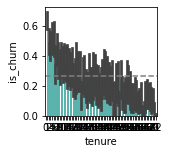


_____________________

online_security 
_____________________

         chi2        p-value  degrees of freedom
0  485.851141  3.153299e-106                   2

observed:
 is_churn             False  True   All
online_security                       
No                    1135   821  1956
No internet service    775    63   838
Yes                    987   162  1149
All                   2897  1046  3943

expected:
              0           1
0  1437.111844  518.888156
1   615.695156  222.304844
2   844.193000  304.807000


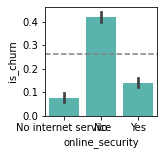


_____________________

online_backup 
_____________________

         chi2       p-value  degrees of freedom
0  324.108754  4.175210e-71                   2

observed:
 is_churn             False  True   All
online_backup                         
No                    1026   677  1703
No internet service    775    63   838
Yes                   1096   306  1402
All                   2897  1046  3943

expected:
              0           1
0  1251.227745  451.772255
1   615.695156  222.304844
2  1030.077099  371.922901


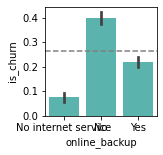


_____________________

device_protection 
_____________________

         chi2       p-value  degrees of freedom
0  301.592175  3.236618e-66                   2

observed:
 is_churn             False  True   All
device_protection                     
No                    1034   662  1696
No internet service    775    63   838
Yes                   1088   321  1409
All                   2897  1046  3943

expected:
              0           1
0  1246.084707  449.915293
1   615.695156  222.304844
2  1035.220137  373.779863


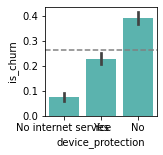


_____________________

tech_support 
_____________________

         chi2        p-value  degrees of freedom
0  482.650975  1.561969e-105                   2

observed:
 is_churn             False  True   All
tech_support                          
No                    1111   810  1921
No internet service    775    63   838
Yes                   1011   173  1184
All                   2897  1046  3943

expected:
              0           1
0  1411.396652  509.603348
1   615.695156  222.304844
2   869.908192  314.091808


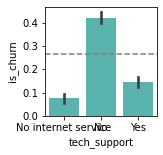


_____________________

monthly_charges 
____________________



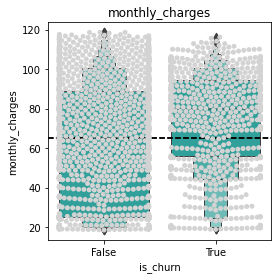

           count       mean        std    min    25%     50%      75%     max
is_churn                                                                     
False     2897.0  61.680877  31.166578  18.55  25.15  64.900  88.9000  118.65
True      1046.0  74.580115  24.696621  18.85  56.25  79.925  94.3875  116.20 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1160715.0, pvalue=2.891105812698731e-29)

____________________

tenure_years 
____________________



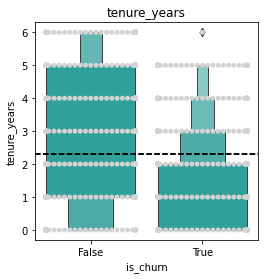

           count      mean       std  min  25%  50%  75%  max
is_churn                                                     
False     2897.0  2.728340  1.997685  0.0  1.0  3.0  5.0  6.0
True      1046.0  1.165392  1.562230  0.0  0.0  0.0  2.0  6.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2199803.0, pvalue=3.243085583327067e-108)

____________________



In [36]:
explore.explore_bivariate(train, 'is_churn', cat_vars, quant_vars)

# Multivariate Stats & Analysis
During this stage, we often add another dimension to our data, such as the target variable as color. We also ask additional, more specific and targeted questions of the data, such as how subgroups compare to each-other and to the overall population. We then answer these questions using visualizations and/or hypothesis testing.

- Takeaways & Actions: 
When a customer chooses: online security, online_backup, device_protection and tech_support they are less likely to churn. These customers are assumed to be risk adverse. 

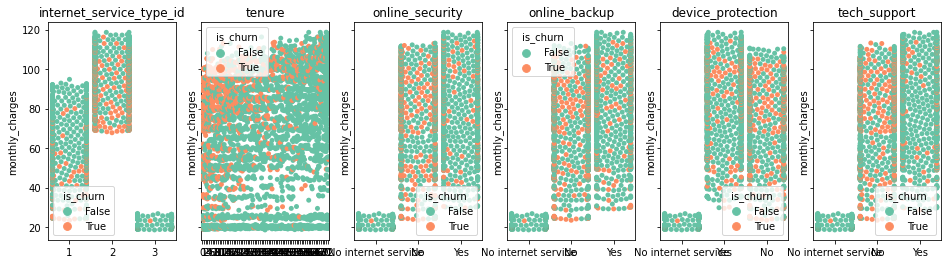

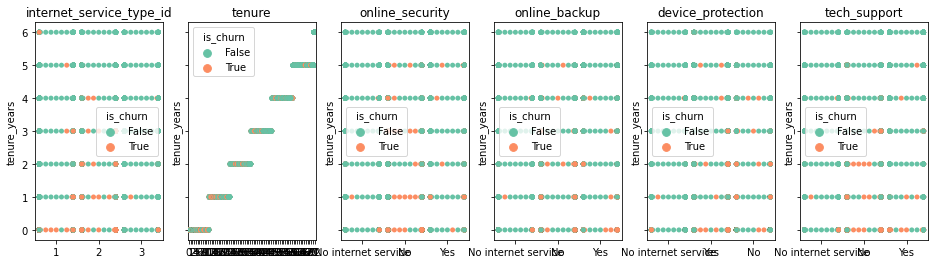

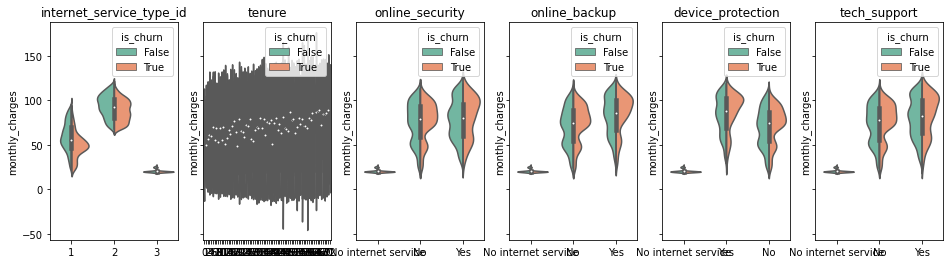

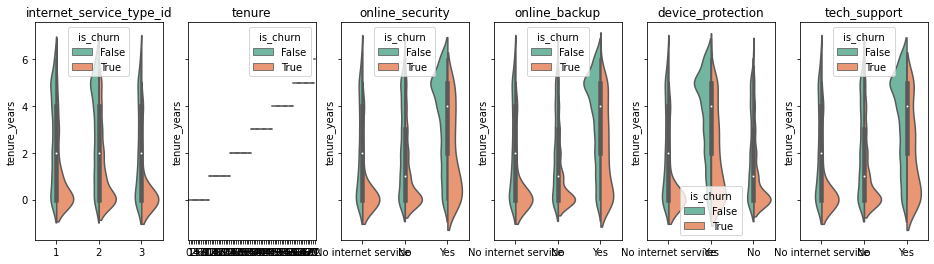

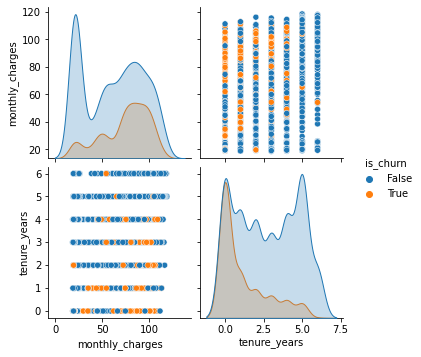

KeyError: "['is_chrun'] not in index"

In [37]:
target = 'is_churn'

explore.explore_multivariate(train, target, cat_vars, quant_vars)